In [1]:
import geopandas as gpd
import shapely
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_boundaries = gpd.read_file('boundaries.geojson')
df_requests = pd.read_csv("./311_Service_Requests.csv")
df_requests = gpd.GeoDataFrame(df_requests, 
            geometry=gpd.points_from_xy(df_requests["LONGITUDE"], df_requests["LATITUDE"]),
            crs="4326")

C:\Users\temp\AppData\Local\Temp\ipykernel_4004\3580924675.py:2: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_requests = pd.read_csv("./311_Service_Requests.csv")


In [3]:
result = gpd.sjoin(df_requests, df_boundaries, predicate='within').groupby('zip').count()

In [4]:
result = result.filter(['geometry'])
result = result.rename(columns={'geometry': 'count'})

<AxesSubplot: >

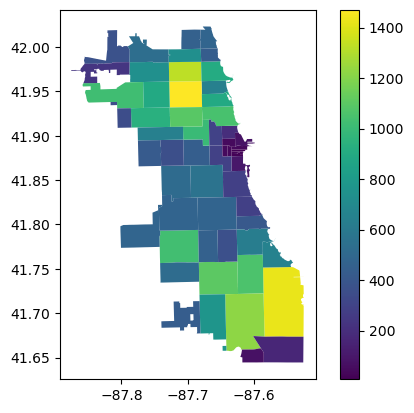

In [5]:
merged = pd.merge(result, df_boundaries, right_on='zip', left_index=True)
merged = merged.set_geometry('geometry')
merged.plot('count', legend=True)

In [6]:
merged.to_file("./requests_by_zip.geojson", driver="GeoJSON")